<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_ANAVA_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/anova-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

사용할 모듈 포함문

In [1]:
import scipy as sp
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## ANOVA

ANalysis Of VAriance

두 개 이상의 그룹의 데이터의 분산을 비교하는 검정 방법이다.

- 일원분산분석(one-way ANOVA)

- 이원분산분석(two-way ANOVA)

- 다원분산분석(multi-way ANOVA)

- 다변량분산분석(MANOVA)

- 공분산분석(ANCOVA)

## 일원분산분석(one-way ANOVA)

독립변수는 1개인데 비교할 그룹은 여러 개일 때 수행하는 ANAVA 검정 방법이다.

다음 세 과목의 성적은 유의하게 차이가 있는지 유의 수준 0.05에서 검정하시오.

kor : 90,80,75,85,70,98,67,88,90,79,95

eng : 80,75,80,55,35,98,89,79,30,50,80,78

mat : 100,90,89,25,95,45,30,78,90,50,24,45,30  

In [2]:
kor = np.array([90,80,75,85,70,98,67,88,90,79,95])
eng  = np.array([ 80,75,80,55,35,98,89,79,30,50,80,78])
mat  = np.array([ 100,90,89,25,95,45,30,78,90,50,24,45,30])

print(f"국어 평균:{kor.mean():.2f} 표준편차:{kor.std(ddof=1):.2f}")
print(f"영어 평균:{eng.mean():.2f} 표준편차:{eng.std(ddof=1):.2f}")
print(f"수학 평균:{mat.mean():.2f} 표준편차:{mat.std(ddof=1):.2f}")

국어 평균:83.36 표준편차:10.04
영어 평균:69.08 표준편차:21.44
수학 평균:60.85 표준편차:29.79


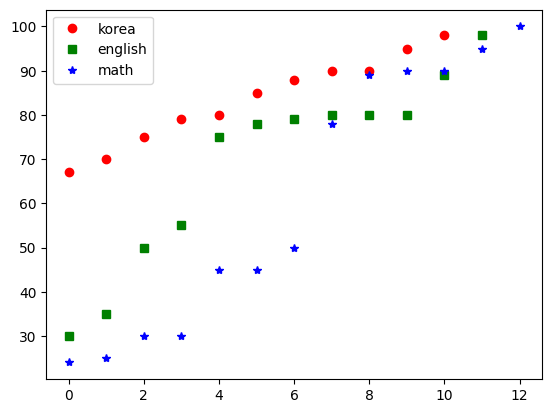

In [3]:
kor.sort()
eng.sort()
mat.sort()
plt.plot(kor,'ro',label='korea')
plt.plot(eng,'gs',label='english')
plt.plot(mat,'b*',label='math')
plt.legend()
plt.show()

In [4]:
fv,pv = stats.f_oneway(kor,eng,mat)

print(f'f-value:{fv:.4f} p-value:{pv:.4f}')
if pv > 0.05:
  print("귀무 가설을 채택한다. 세 과목은 통계적으로 유의하게 차이가 없다.")
else:
  print("귀무 가설을 기각한다. 세 과목은 통계적으로 유의하게 차이가 있다.")


f-value:3.0165 p-value:0.0626
귀무 가설을 채택한다. 세 과목은 통계적으로 유의하게 차이가 없다.


## 이원분산분석(two-way ANOVA)

독립변수가 2개 이상이고 비교할 그룹은 여러 개일 때 수행하는 ANAVA 검정 방법이다.

세 종류의 제품을 백화점에 입점하였을 때와 임접하지 않았을 때 매출액은 다음과 같다고 한다.

A: 80, 95

B: 120, 80

C: 130, 100

제품과 백화점 입점이 매출에 영향을 미치는지 유의 수준 0.05에서 이원분산분석하시오.

In [5]:
df = pd.DataFrame()
df['product'] =['a','a','b','b','b','c','c','c']
df['in_depart'] =[0,1,0,1,1,0,0,1]
df['sales'] =[80,70,70,100,90,40,40,50]

In [6]:
model = ols("sales ~ C(product) + C(in_depart)",df)
om = model.fit()
res = anova_lm(om)
print(res)

               df       sum_sq      mean_sq          F    PR(>F)
C(product)    2.0  2966.666667  1483.333333  14.833333  0.014116
C(in_depart)  1.0   183.333333   183.333333   1.833333  0.247178
Residual      4.0   400.000000   100.000000        NaN       NaN


## 다변량분산분석(MANOVA)

a, b, c 세 종류의 제품이 백화점 입점 여부에 다른 매출액과 수익이 다음과 같다.

상품과 백화점 입점 여부는 매출액과 수익에 영향을 주는지 유의 수준 0.05에서 검정하시오.

상품: 'a','a','b','b','b','c','c','c'

입점: 0,1,0,1,1,0,0,1

매출: 80,70,70,100,90,40,40,50

수익: 20,10,5,20,10,20,20,5

In [17]:
from statsmodels.multivariate.manova import MANOVA

In [18]:
df = pd.DataFrame()
df['product'] =['a','a','b','b','b','c','c','c']
df['in_depart'] =[0,1,0,1,1,0,0,1]
df['sales'] =[80,70,70,100,90,40,40,50]
df['profit'] =[20,10,5,20,10,20,20,5]

In [27]:
maov = MANOVA.from_formula('C(product) + C(in_depart) ~ sales + profit', data=df)
res = maov.mv_test()
print(res.summary_frame['Pr > F'])

Effect     Statistic             
Intercept  Wilks' lambda                  1.0
           Pillai's trace                 1.0
           Hotelling-Lawley trace         1.0
           Roy's greatest root            1.0
sales      Wilks' lambda             0.017621
           Pillai's trace            0.004507
           Hotelling-Lawley trace    0.018402
           Roy's greatest root       0.018445
profit     Wilks' lambda             0.592632
           Pillai's trace            0.589228
           Hotelling-Lawley trace    0.794161
           Roy's greatest root       0.594568
Name: Pr > F, dtype: object


## 공분산분석(ANCOVA)

ANalysis of COVAriance

영향을 주는 요인을 고려하여 분산 분석하는 검정 방법이다.


In [10]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=ecab0afcaf98fc7998dea02b08f43c8a7a70ee7804de8ce34b555beea109d71d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [11]:
from pingouin import ancova

In [12]:
df = pd.DataFrame()
df['product'] =[0,0,1,1,1,2,2,2]
df['in_depart'] =[0,1,0,1,1,0,0,1]
df['sales'] =[30,70,70,100,90,40,40,50]
df['profit'] =[20,10,5,20,10,20,20,5]

In [13]:
ancova(data=df, dv='profit', covar=['product','in_depart'], between='sales')

,Source,SS,DF,F,p-unc,np2
0,sales,3.214286e+02,5,2.442800e+28,4.857579e-15,1.00000
1,product,5.454545e+01,1,2.072679e+28,4.421953e-15,1.00000
2,in_depart,1.090521e-28,1,4.143885e-02,8.721531e-01,0.03979
3,Residual,2.631640e-27,1,NaN,NaN,NaN


In [14]:
data = pd.DataFrame({'methodology': np.repeat(['A', 'B', 'C'], 4),
                     'current_grade': [67, 88, 75, 85,
                                       92, 77, 74, 88,
                                       91, 88, 82, 80],
                     'test_score': [77, 89, 74, 69,
                                    88, 93, 94, 90,
                                    85, 81, 83, 79]})

ancova(data=data, dv='test_score', covar='current_grade', between='methodology')

,Source,SS,DF,F,p-unc,np2
0,methodology,387.510992,2,6.005703,0.025542,0.600228
1,current_grade,1.404669,1,0.043540,0.839927,0.005413
2,Residual,258.095331,8,NaN,NaN,NaN


In [15]:
data['diff'] = data['test_score']-data['current_grade']
print(stats.f_oneway(data['test_score'],data['current_grade']))
print(stats.f_oneway(data['test_score'],data['diff']))
print(stats.f_oneway(data['diff'],data['current_grade']))
print(stats.f_oneway(data['test_score'],data['diff'],data['current_grade']))
data.corr()

F_onewayResult(statistic=0.15516268572503292, pvalue=0.6974417441593221)
F_onewayResult(statistic=505.2982034233979, pvalue=1.143655341255494e-16)
F_onewayResult(statistic=490.2643645626946, pvalue=1.5730135056428995e-16)
F_onewayResult(statistic=361.76156693398804, pvalue=3.5885044945310236e-23)


<ipython-input-15-a7be427870e3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,current_grade,test_score,diff
current_grade,1.000000,0.170773,-0.643648
test_score,0.170773,1.000000,0.644161
diff,-0.643648,0.644161,1.000000


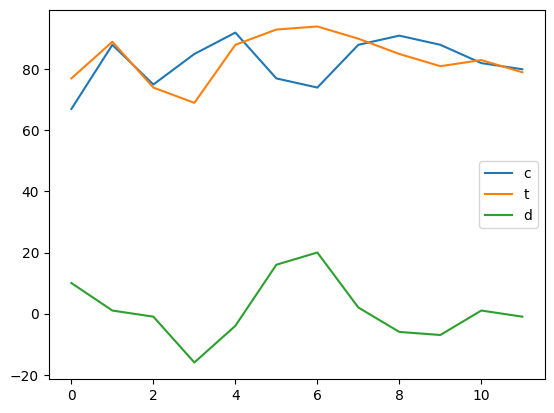

In [16]:
plt.plot(data['current_grade'],label='c')
plt.plot(data['test_score'],label='t')
plt.plot(data['diff'],label='d')
plt.legend()
plt.show()